# Современные методы анализа данных и машинного обучения, БИ

## НИУ ВШЭ, 2024-25 учебный год

# Семинар 11. Оценка параметров

Сегодня мы поговорим про такую важнейшую вещь, как оценка неизвестных параметров известного распределения. И разберем два основных подхода, которые используются для этого в анализе данных. Поехали!

## Распределения и случайные величины

### Случайная величина

Случайная величина — переменная, значения которой представляют собой численные исходы некоторого случайного феномена или эксперимента. Другими словами, это численное выражение результата случайного события.



Примеры:

1. Бросок монеты
2. Бросок кости
3. Время от учебы до дома
4. Время проверки домашних заданий
5. ...

Приведите еще ваши примеры!



### Функция плотности

Для случайных процессов, имеющих непрерывное распределение, существует функция плотности этого распределения. В каждой точке области определения она показывает относительную вероятность появления значений из любой малой окрестности этой точки.

Пример функции плотности нормального распределения представлен на изображении ниже:

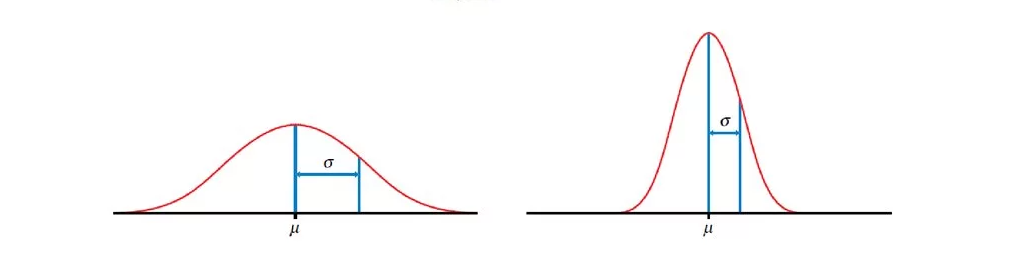

### Функция вероятности

Для дискретных процессов вместо функции плотности имеет место функция вероятности, которая в каждой точке показывает вероятность появления значения равного этой точке.

Например, ниже функция вероятности для распределения Пуассона с разными параметрами:

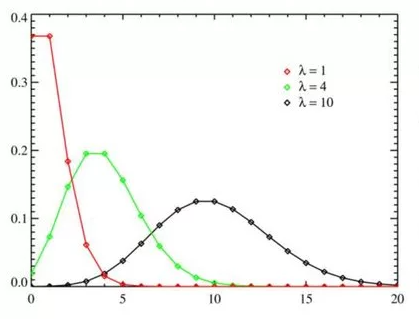

### Примеры распределений

Некоторые примеры важных распределений:


Биномиальное распределение:
$$p(x, n, p) = {n \choose x} p^x (1 - p)^{n - x}$$

Нормальное распределение:
$$f(x, \mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} \exp{(-\frac{(x - \mu)^2}{2 \sigma^2})}$$

Гамма распределение:
$$f(x, \alpha, \beta) =  \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} \exp(-\beta x),$$

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import gamma, norm, bernoulli

## Метод моментов

Идея простая. Если мы хотим определить параметры некоторого распределения $f(x, \theta)$, то давайте приравняем теоретические моменты данного распределения к моментам подсчитанным по данным($X = \{ x_1, \dots, x_n \}$) и решим уравнения относительно данных моментов.

Моменты по данным (выборочные моменты) считаются следующим образом.

Начальные моменты:

$$\hat{\mu}_k = \frac{1}{n} \sum\limits_{i=1}^{n} x_i^k$$

Центральные моменты:

$$\hat{v}_k = \frac{1}{n} \sum\limits_{i=1}^{n} (x_i - \hat{\mu}_1)^k$$

Моменты исходя из распределения считаются следующим образом.

Моменты дискретных распределений (теоретические моменты):

$$\mu_k = \sum\limits_{i=1}^{n} x_i^k p(x_i, \theta)$$

Моменты непрерывных распределений (теоретические моменты):

$$\mu_k = \int\limits_{-∞}^{+∞} x^k f(x, \theta) dx$$





### Задания для самостоятельного решения (выполняются у доски):


#### Задание 1.

Рассмотрим нормальное распределение. Оцените его параметры методом моментов

#### Задание 2.

Имеем биномиальное распределение. Оцените его параметры методом моментов. (Необходимо воспроизвести то, что было на доске на лекции)

#### Задание 3.

Оцените параметры равномерного распределения методом моментов

#### Задание 4*.

Давайте рассмотрим задачу посложнее, с гамма распределением. Первый и второй начальный моменты гамма-распределения подсчитываются по следующей формуле:

$$E(X) = \frac{\alpha}{\beta}$$

$$E(X^2) = \frac{\alpha^2}{\beta^2} + \frac{\alpha}{\beta^2}$$

Получите оценку параметров этого распределения методом моментов



### Практика

Теперь поэксперементируем с последним распределением (гамма-распределением) на практике.

Для начала зададим параметры генерации распределения (истинные параметры):

In [2]:
np.random.seed(2025)

alpha = 0.23
beta = 5.35

Посмотрим, что вообще собой представляет гамма-распределение. Изобразим его функцию плотности

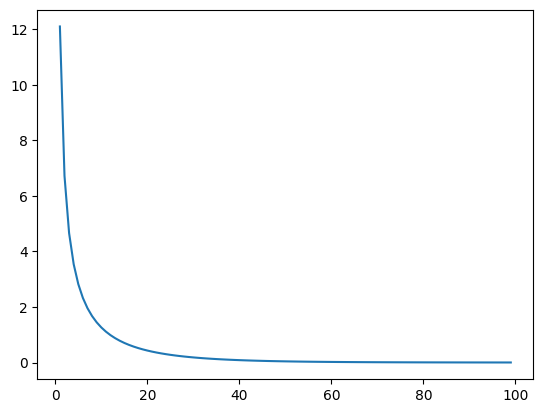

In [3]:
x = np.linspace(0, 1, 100)
plt.plot(gamma.pdf(x, scale=1 / beta, a=alpha));

Теперь оценим параметры $\alpha$ и $\beta$ для гамма-распределения с помощью метода моментов. Запустим алгоритм 10000 раз и посмотрим какие значения будут получаться

In [4]:
%%time
boot = 100000
fitted_alphas = []
fitted_betas = []
for i in range(boot):
    X = gamma.rvs(scale=1 / beta, a=alpha, size=100)

    mu_1 = X.mean()
    mu_2 = np.square(X).mean()

    fitted_betas.append(
        mu_1 / (mu_2 - mu_1**2)
    )

    fitted_alphas.append(
        mu_1**2 / (mu_2 - mu_1**2)
    )

CPU times: user 5.42 s, sys: 35.9 ms, total: 5.45 s
Wall time: 5.46 s


Визуализируем истинное (теоретическое) значение $\alpha$, а также распределение полученных (оцененных) нами значений с квантилями

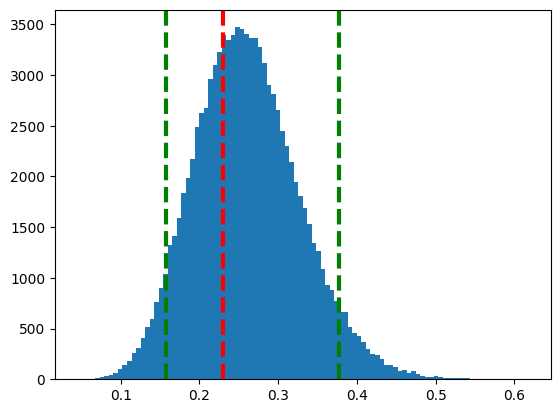

In [5]:
plt.hist(fitted_alphas, bins=100);
alpha_q5, alhpa_q95 = np.percentile(fitted_alphas, [5, 95])
plt.axvline(x=alpha, linewidth=3, color='r',linestyle='--')
plt.axvline(x=alpha_q5, linewidth=3, color='g',linestyle='--')
plt.axvline(x=alhpa_q95, linewidth=3, color='g',linestyle='--')

Аналогично поступим для $\beta$

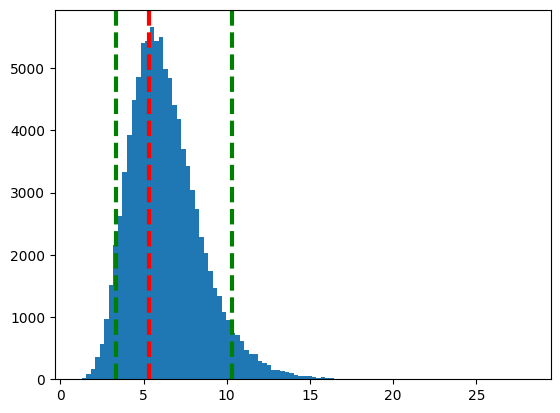

In [6]:
plt.hist(fitted_betas, bins=100);
beta_q5, beta_q95 = np.percentile(fitted_betas, [5, 95])
plt.axvline(x=beta, linewidth=3, color='r',linestyle='--')
plt.axvline(x=beta_q5, linewidth=3, color='g',linestyle='--')
plt.axvline(x=beta_q95, linewidth=3, color='g',linestyle='--')

Выведем истинные значения для параметров $\alpha$ и $\beta$, средние по оцененным нами параметрам, а также ошибку:

In [7]:
print('True alpha: ', alpha)
print('True beta: ', beta)
print()

print('Estimated alpha: ', np.mean(np.array(fitted_alphas)))
print('Estimated beta: ', np.mean(np.array(fitted_betas)))
print()

print('Alpha error: ', np.mean(np.array(fitted_alphas) - alpha))
print('Beta error: ', np.mean(np.array(fitted_betas) - beta))

True alpha:  0.23
True beta:  5.35

Estimated alpha:  0.260777045461006
Estimated beta:  6.343778991158734

Alpha error:  0.030777045461005955
Beta error:  0.993778991158734


## Метод максимального правдоподобия

MLE (Метод оценки параметров максимума правдоподобия) основывается на максимизации вероятности пронаблюдать выборку.

Используемая в алгоритме функция правдоподобия имеет следующий вид:

$$\mathcal{L} = \prod_{i = 1}^{n} f(x_i, \theta)$$

Уравнение правдоподобия часто записывается с использованием логарифма функции правдоподобия, так как в этом случае произведение переходит в сумму, что сильно упрощает жизнь.

$$\mathcal{\log L} = \sum_{i = 1}^{n} \log f(x_i, \theta)$$

  * более хорошая численная стабильность (предотвращает overflow или underflow ошибки);
  * более (относительно) точные градиенты;
  * более гладкая задача (методы оптимизации лучше работают).



### Задания для самостоятельного решения (выполняются у доски):


#### Задание 5.

Рассмотрим случайную величину, имеющую распределение Пуассона:

$$p(x, \lambda) = \frac{\lambda ^x}{x!} e^{-\lambda}$$

Оцените его параметр методом максимального правдоподобия

#### Задание 6.

Имеем биномиальное распределение

$$p(x, n, p) = {n \choose x} p^x (1 - p)^{n - x}$$

Оцените его параметр $p$ методом максимального правдоподобия, при условии, что параметр $n$ считается заданным.

#### Задание 7*.

Оцените параметры нормального распределения методом максимального правдоподобия

### Практика

В большинстве задач, если это не игровые примеры, найти явную форму для оценки параметров с помощью MLE очень сложно.

$$\theta^* = \arg \max \log \mathcal{L}(X, \theta)$$

Берём первую производную по каждому параметру распределения и приравниваем к нулю.

Например, для упоминавшегося выше гамма-распределения имеем следующую задачу:


$$\mathcal{L} = \prod\limits_i \frac{\beta^\alpha}{\Gamma(\alpha)} {x_i}^{\alpha-1} \exp(-\beta x_i)$$

$$\mathcal{\log L} = \sum\limits_i \left(  \alpha \log \beta - \log \Gamma(\alpha) - \beta x_i + (\alpha - 1) \log x_i \right)$$

Решая эту (сложную) оптимизационную задачу математического анализа (опуская выкладки), получаем следующие результаты:

$$\alpha = \log \beta + \frac{1}{N} \sum \log x_i$$

$$\beta = \frac{\alpha N}{\sum\limits_i x_i}$$

Посмотрим это на практике. Визуализируем теоретическую функцию правдоподобия для нашего распределения:

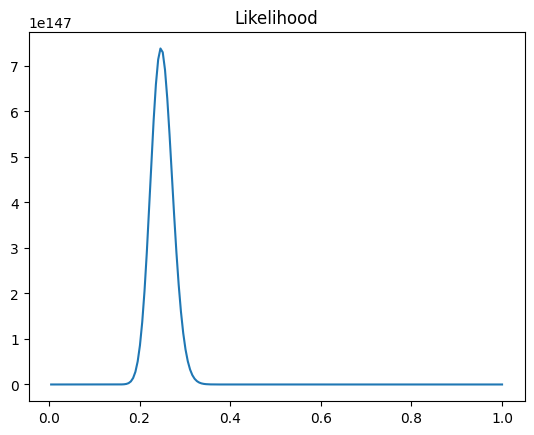

In [8]:
a = np.linspace(0, 1, 200)
plt.plot(
    a,
    np.prod(gamma.pdf(X[:, np.newaxis],
                      scale=1 / beta,
                      a=a),
            axis=0)
)
plt.title('Likelihood');

Визуализируем теоретическую лог-функцию правдоподобия:

Text(0.5, 1.0, 'Log-Likelihood')

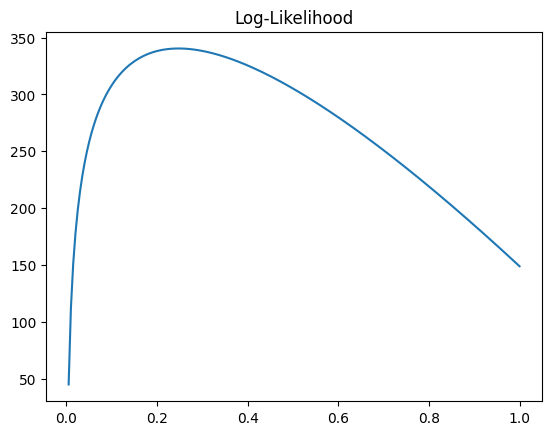

In [9]:
plt.plot(
    a,
    np.sum(
        gamma.logpdf(
            X[:, np.newaxis],
            scale=1 / beta,
            a=a
        ),
        axis=0
    )
)
plt.title('Log-Likelihood')

Теперь оценим параметры $\alpha$ и $\beta$ для гамма-распределения с помощью метода максимального правдоподобия. Запустим алгоритм 10000 раз и посмотрим какие значения будут получаться

In [10]:
%%time
boot = 100000
fitted_alphas = []
fitted_betas = []
for i in range(boot):
    X = gamma.rvs(scale=1 / beta, a=alpha, size=100)

    fit_alpha, _, fit_beta = gamma.fit(X, floc=0)

    fitted_betas.append(1 / fit_beta)
    fitted_alphas.append(fit_alpha)

CPU times: user 10.8 s, sys: 131 ms, total: 11 s
Wall time: 10.9 s


Визуализируем истинное (теоретическое) значение $\alpha$, а также распределение полученных (оцененных) нами значений с квантилями

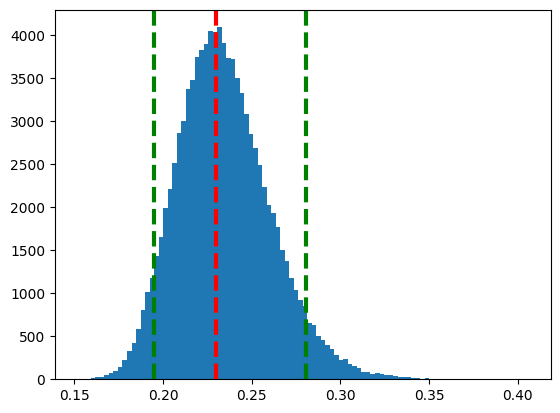

In [11]:
plt.hist(fitted_alphas, bins=100);
alpha_q5, alhpa_q95 = np.percentile(fitted_alphas, [5, 95])
plt.axvline(x=alpha, linewidth=3, color='r',linestyle='--')
plt.axvline(x=alpha_q5, linewidth=3, color='g',linestyle='--')
plt.axvline(x=alhpa_q95, linewidth=3, color='g',linestyle='--')

Аналогично поступим для $\beta$

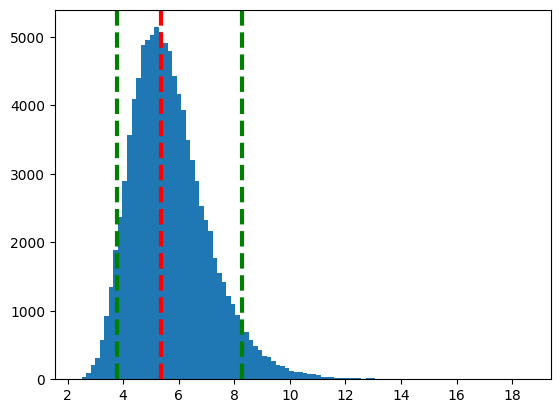

In [12]:
plt.hist(fitted_betas, bins=100);
beta_q5, beta_q95 = np.percentile(fitted_betas, [5, 95])
plt.axvline(x=beta, linewidth=3, color='r',linestyle='--')
plt.axvline(x=beta_q5, linewidth=3, color='g',linestyle='--')
plt.axvline(x=beta_q95, linewidth=3, color='g',linestyle='--')

Выведем истинные значения для параметров $\alpha$ и $\beta$, средние по оцененным нами параметрам, а также ошибку:

In [13]:
print('True alpha: ', alpha)
print('True beta: ', beta)
print()

print('Estimated alpha: ', np.mean(np.array(fitted_alphas)))
print('Estimated beta: ', np.mean(np.array(fitted_betas)))
print()

print('Alpha error: ', np.mean(np.array(fitted_alphas) - alpha))
print('Beta error: ', np.mean(np.array(fitted_betas) - beta))

True alpha:  0.23
True beta:  5.35

Estimated alpha:  0.2345356851753025
Estimated beta:  5.7034057779416205

Alpha error:  0.004535685175302505
Beta error:  0.35340577794162215
